<a href="https://colab.research.google.com/github/adityababar5988/food-runner-android-application-in-kotlin-language/blob/main/stock_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn

In [3]:
df= pd.read_csv("/content/drive/MyDrive/interhip/netflix.csv")
closed_prices = df["Close"]


In [4]:
seq_len = 15

In [5]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [6]:
X=[]
Y=[]

In [7]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])

In [8]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]


In [9]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()

In [10]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])




In [11]:
model = Model(1,64)

In [12]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
loss_fn = nn.MSELoss()

In [14]:
num_epochs=100

In [15]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())

10 epoch loss 0.005347247
20 epoch loss 0.0057082446
30 epoch loss 0.005033276
40 epoch loss 0.004634696
50 epoch loss 0.0043473467
60 epoch loss 0.003916596
70 epoch loss 0.003306234
80 epoch loss 0.0021049997
90 epoch loss 0.00015664901


In [16]:
model.eval()
with torch.no_grad():
    output=model(test_x)

In [17]:
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())

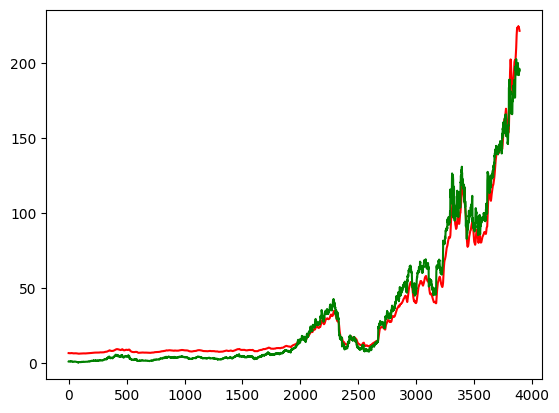

In [18]:
plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()